# K近邻法（KNN）



## 算法过程

> 1, 计算训练样本和测试样本中每个样本点的距离（常见的距离度量有欧式距离，马氏距离等）；  
2, 对上面所有的距离值进行排序；  
3, 选前k个最小距离的样本；  
4, 根据这k个样本的标签进行投票，得到最后的分类类别；  


## 用K-近邻算法分类一部电影是爱情片还是动作片


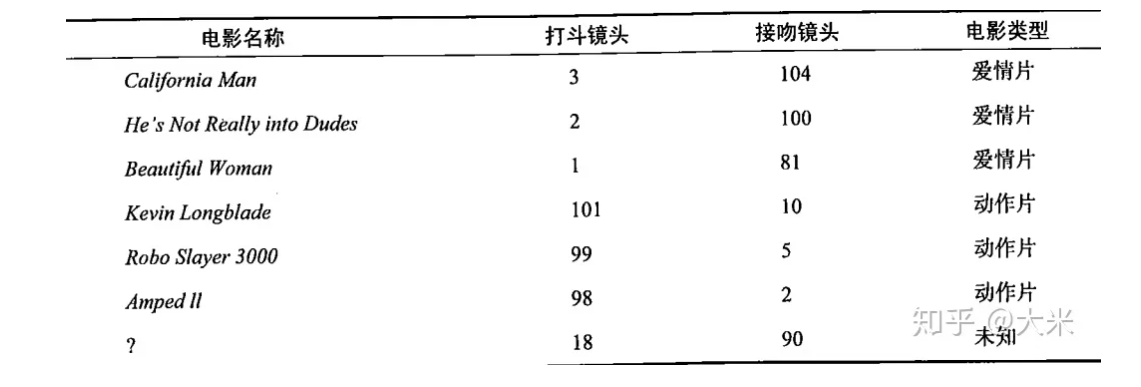

现在我们想要预测最后一部电影是什么类型。


### 距离度量

设特定空间 $\mathcal{X}$ 是$n$维实数向量空间


$$
x_{i}, x_{j} \in \mathcal{X}
$$
$$
x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}
$$
$$
x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \cdots, x_{j}^{(n)}\right)^{\mathrm{T}}
$$

则：$x_i$,$x_j$的$L_p$距离定义为:

$$
L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{i=1}^{n}\left|x_{i}^{(i)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}
$$

其中当
- $p= 1$  为曼哈顿距离
- $p= 2$  为欧氏距离
- $p= \infty$   为切比雪夫距离




In [5]:
import math
from itertools import combinations

def L(x,y,p=2):
    if len(x)==len(y) and len(x)>1:
        sum = 0 
        for i in range(len(x)):
            sum += math.pow(abs(x[i]-y[i]),p)
        return math.pow(sum,1/p)
    else:
        return 0 
            

In [6]:
x1 = [1,1,5]
print(range(len(x1)))
for i in range(len(x1)):
    print(i)

range(0, 3)
0
1
2


通过可视化数据集：

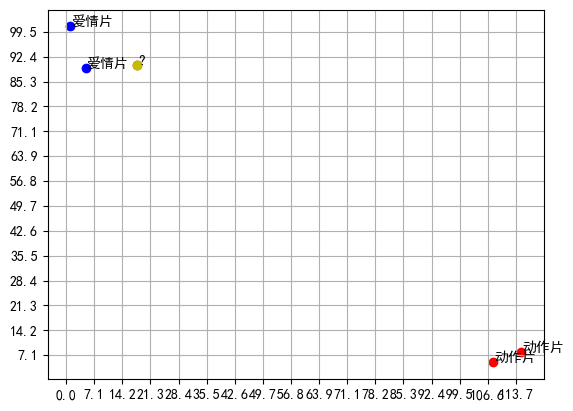

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]
 [ 18  90]]
['爱情片', '爱情片', '动作片', '动作片', '?']


In [42]:
# -*- coding: UTF-8 -*-
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
"""
函数说明:创建数据集

Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
"""
def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8],[18,90]])
    #四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片','?']
    return group, labels
if __name__ == '__main__':
    #创建数据集
    group, labels = createDataSet()
    x_ticks = np.linspace(0,135,20)
    plt.xticks(x_ticks)
    plt.yticks(x_ticks)
    plt.scatter(group[:2, 0],group[:2, 1],color='b')
    plt.scatter(group[2:, 0],group[2:, 1],color='r')
    plt.grid()
    plt.scatter(18,90,color='y')
    for i in range(len(labels)):
        plt.annotate(labels[i]  , xy = group[i], xytext = (group[i][0]+0.21, group[i][1]+0.21)) # 这里xy是需要标记的坐标，
    # xytext是对应的标签坐标
    plt.show()
   
    #打印数据集
    print(group)
    print(labels)

> 重点是 np.tile 的用法

In [53]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator

"""
函数说明:创建数据集

Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
"""
def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    #四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels

"""
函数说明:kNN算法,分类器

Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
"""
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加，sum(0)列相加，sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方，计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

if __name__ == '__main__':
    #创建数据集
    group, labels = createDataSet()
    #测试集
    test = [101,20]
    
    
    dataSetSize = group.shape[0]
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    print(group)
    print("--------")
    print(test)
    print("--------")
    diffMat = np.tile(test, (dataSetSize, 1)) - group  # 重点是 np.tile 的用法
    print(diffMat)
    #kNN分类
    test_class = classify0(test, group, labels, 3)
    #打印分类结果
    print(test_class)

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
--------
[101, 20]
--------
[[100 -81]
 [ 96 -69]
 [ -7  15]
 [-14  12]]
动作片


## 实例

### iris 数据集

**[数据：鸢尾花数据集]**(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

y_pred [0 2 2 1 0 2 1 2 2 2 1 2 1 1 0 0 0 1 0 1 1 1 1 2 1 1 0 1 0 1 1 1 0 0 0 0 2
 1]
y_test [0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]
score on train set 0.8482142857142857
score on test set 0.6842105263157895
accuracy score 0.6842105263157895


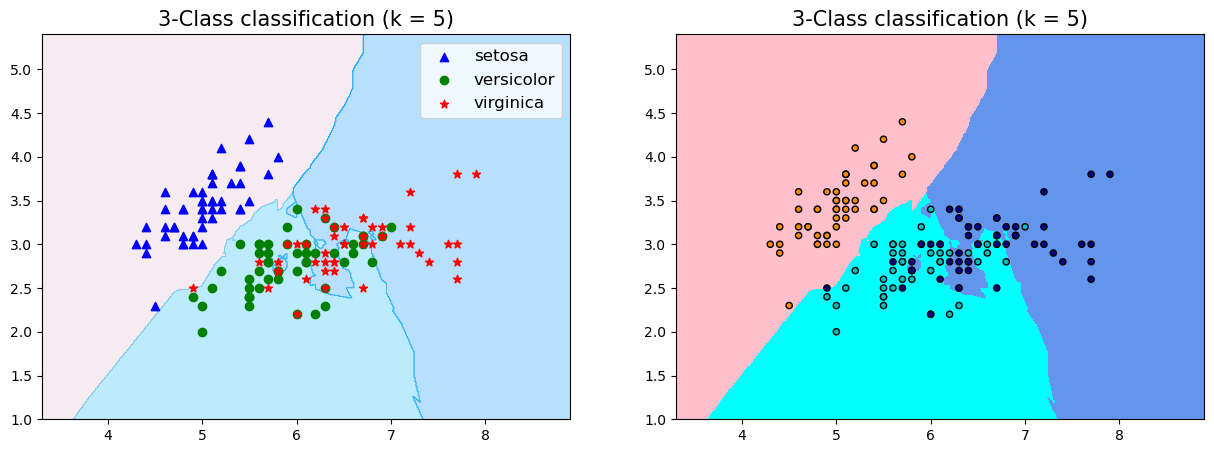

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
#导入iris数据
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data[:,:2] #只取前两列
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42) #划分数据，random_state固定划分方式
#导入模型
from sklearn.neighbors import KNeighborsClassifier 
#训练模型
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#查看各项得分
print("y_pred",y_pred)
print("y_test",y_test)
print("score on train set", knn.score(X_train, y_train))
print("score on test set", knn.score(X_test, y_test))
print("accuracy score", accuracy_score(y_test, y_pred))

# 可视化

# 自定义colormap
def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#FFC0CB','#00BFFF', '#1E90FF'], 256)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
axes=[x_min, x_max, y_min, y_max]
xp=np.linspace(axes[0], axes[1], 500) #均匀500的横坐标
yp=np.linspace(axes[2], axes[3],500) #均匀500个纵坐标
xx, yy=np.meshgrid(xp, yp) #生成500X500网格点
xy=np.c_[xx.ravel(), yy.ravel()] #按行拼接，规范成坐标点的格式
y_pred = knn.predict(xy).reshape(xx.shape) #训练之后平铺

# 可视化方法一
plt.figure(figsize=(15,5),dpi=100)
plt.subplot(1,2,1)
plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=colormap())
#画三种类型的点
p1=plt.scatter(X[y==0,0], X[y==0, 1], color='blue',marker='^')
p2=plt.scatter(X[y==1,0], X[y==1, 1], color='green', marker='o')
p3=plt.scatter(X[y==2,0], X[y==2, 1], color='red',marker='*')
#设置注释
plt.legend([p1, p2, p3], iris['target_names'], loc='upper right',fontsize='large')
#设置标题
plt.title(f"3-Class classification (k = {n_neighbors})", fontdict={'fontsize':15} )

# 可视化方法二
plt.subplot(1,2,2)
cmap_light = ListedColormap(['pink', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
plt.pcolormesh(xx, yy, y_pred, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = {n_neighbors})" ,fontdict={'fontsize':15})
plt.show()

### 手写代码实现

In [2]:
# 导入相关模块

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.utils import shuffle

# 导入sklearn iris 数据集
iris = datasets.load_iris()

# 打乱数据后的数据与标签
X,y = shuffle(iris.data,iris.target,random_state=13)

# 数据转换为float32格式
X = X.astype(np.float32)

# 训练集与测试集的简单划分，训练-测试比例为7：3
offset = int(X.shape[0]*0.8)

X_train,y_train = X[:offset],y[:offset]
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集大小
print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)


X_train= (120, 4)
X_test= (30, 4)
y_train= (120,)
y_test= (30, 1)


In [26]:
### 定义欧氏距离

### 定义欧氏距离
def compute_distances(X, X_train):
    '''
    输入：
    X：测试样本实例矩阵
    X_train：训练样本实例矩阵
    输出：
    dists：欧式距离
    '''
    # 测试实例样本量
    num_test = X.shape[0]
    # 训练实例样本量
    num_train = X_train.shape[0]
    # 基于训练和测试维度的欧氏距离初始化
    dists = np.zeros((num_test, num_train)) 
    # 测试样本与训练样本的矩阵点乘
    M = np.dot(X, X_train.T)
    # 测试样本矩阵平方
    te = np.square(X).sum(axis=1)
    # 训练样本矩阵平方
    tr = np.square(X_train).sum(axis=1)
    # 计算欧式距离
    dists = np.sqrt(-2 * M + tr + np.matrix(te).T)    
    return dists

C:\Users\Jochoi\AppData\Local\Temp\ipykernel_22852\1568592492.py:25: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(-2 * M + tr + np.matrix(te).T)


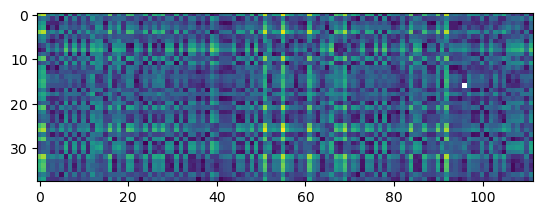

In [27]:
dists = compute_distances(X_test, X_train)
plt.imshow(dists, interpolation='none')
plt.show();

In [28]:
### 定义预测函数
def predict_labels(y_train, dists, k=1):
    '''
    输入：
    y_train：训练集标签
    dists：测试集与训练集之间的欧氏距离矩阵
    k：k值
    输出：
    y_pred：测试集预测结果
    '''
    # 测试样本量
    num_test = dists.shape[0]
    # 初始化测试集预测结果
    y_pred = np.zeros(num_test) 
    # 遍历   
    for i in range(num_test):
        # 初始化最近邻列表
        closest_y = []
        # 按欧氏距离矩阵排序后取索引，并用训练集标签按排序后的索引取值
    # 最后拉平列表
    # 注意np.argsort函数的用法
        labels = y_train[np.argsort(dists[i, :])].flatten()
        # 取最近的k个值
        closest_y = labels[0:k]
        # 对最近的k个值进行计数统计
        # 这里注意collections模块中的计数器Counter的用法
        c = Counter(closest_y)
        # 取计数最多的那一个类别
        y_pred[i] = c.most_common(1)[0][0]    
    return y_pred
#%%


In [29]:
# 测试集预测结果
y_test_pred = predict_labels(y_train, dists, k=1)
y_test_pred = y_test_pred.reshape((-1, 1))
# 找出预测正确的实例
num_correct = np.sum(y_test_pred == y_test)
# 计算准确率
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d/%d correct=>accuracy:%f'% (num_correct, X_test.shape[0], accuracy))

Got 483/38 correct=>accuracy:12.710526


In [30]:
### 5折交叉验证
num_folds = 5
# 候选k值
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
X_train_folds = []
y_train_folds = []
# 训练数据划分
X_train_folds = np.array_split(X_train, num_folds)
# 训练标签划分
y_train_folds = np.array_split(y_train, num_folds)
k_to_accuracies = {}
# 遍历所有候选k值
for k in k_choices:
    # 五折遍历    
    for fold in range(num_folds): 
        # 对传入的训练集单独划出一个验证集作为测试集
        validation_X_test = X_train_folds[fold]
        validation_y_test = y_train_folds[fold]
        temp_X_train = np.concatenate(X_train_folds[:fold] + X_train_folds[fold + 1:])
        temp_y_train = np.concatenate(y_train_folds[:fold] + y_train_folds[fold + 1:])       
        # 计算距离
        temp_dists = compute_distances(validation_X_test, temp_X_train)
        temp_y_test_pred = predict_labels(temp_y_train, temp_dists, k=k)
        temp_y_test_pred = temp_y_test_pred.reshape((-1, 1))       
        # 查看分类准确率
        num_correct = np.sum(temp_y_test_pred == validation_y_test)
        num_test = validation_X_test.shape[0]
        accuracy = float(num_correct) / num_test
        k_to_accuracies[k] = k_to_accuracies.get(k,[]) + [accuracy]


# 打印不同 k 值不同折数下的分类准确率
for k in sorted(k_to_accuracies):    
      for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 7.608696
k = 1, accuracy = 8.130435
k = 1, accuracy = 7.454545
k = 1, accuracy = 8.181818
k = 1, accuracy = 7.727273
k = 3, accuracy = 7.608696
k = 3, accuracy = 7.869565
k = 3, accuracy = 7.454545
k = 3, accuracy = 8.000000
k = 3, accuracy = 7.909091
k = 5, accuracy = 7.608696
k = 5, accuracy = 7.869565
k = 5, accuracy = 7.454545
k = 5, accuracy = 7.272727
k = 5, accuracy = 8.090909
k = 8, accuracy = 7.652174
k = 8, accuracy = 7.913043
k = 8, accuracy = 7.454545
k = 8, accuracy = 7.272727
k = 8, accuracy = 7.909091
k = 10, accuracy = 7.739130
k = 10, accuracy = 7.956522
k = 10, accuracy = 7.454545
k = 10, accuracy = 7.090909
k = 10, accuracy = 7.727273
k = 12, accuracy = 7.739130
k = 12, accuracy = 7.869565
k = 12, accuracy = 7.454545
k = 12, accuracy = 7.454545
k = 12, accuracy = 7.545455
k = 15, accuracy = 7.739130
k = 15, accuracy = 7.869565
k = 15, accuracy = 7.454545
k = 15, accuracy = 7.636364
k = 15, accuracy = 7.363636
k = 20, accuracy = 7.739130
k = 20, accu

C:\Users\Jochoi\AppData\Local\Temp\ipykernel_22852\1568592492.py:25: RuntimeWarning: invalid value encountered in sqrt
  dists = np.sqrt(-2 * M + tr + np.matrix(te).T)


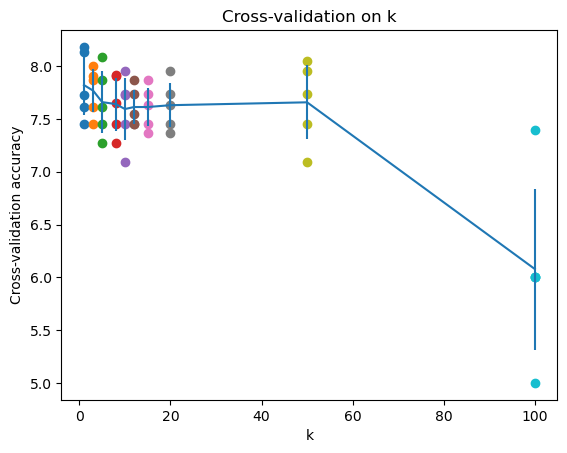

In [31]:
# 打印不同 k 值不同折数下的分类准确率
for k in k_choices:
    # 取出第k个k值的分类准确率
    accuracies = k_to_accuracies[k]
    # 绘制不同k值准确率的散点图
    plt.scatter([k] * len(accuracies), accuracies)
# 计算准确率均值并排序
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
# 计算准确率标准差并排序
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
# 绘制有置信区间的误差棒图
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
# 绘图标题
plt.title('Cross-validation on k')
# x轴标签
plt.xlabel('k')
# y轴标签
plt.ylabel('Cross-validation accuracy')
plt.show();

In [32]:
# 导入KneighborsClassifier模块
from sklearn.neighbors import KNeighborsClassifier
# 创建k近邻实例
neigh = KNeighborsClassifier(n_neighbors=10)
# k近邻模型拟合
neigh.fit(X_train, y_train)
# k近邻模型预测
y_pred = neigh.predict(X_test)
# 预测结果数组重塑
y_pred = y_pred.reshape((-1, 1))
# 统计预测正确的个数
num_correct = np.sum(y_pred == y_test)
# 计算准确率
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, X_test.shape[0], accuracy))

Got 481 / 38 correct => accuracy: 12.657895


### SkelarnKNN参数概述

要使用sklearnKNN算法进行分类，我们需要先了解sklearnKNN算法的一些基本参数，那么这节就先介绍这些内容吧。
```
def KNeighborsClassifier(n_neighbors = 5,
                       weights='uniform',
                       algorithm = '',
                       leaf_size = '30',
                       p = 2,
                       metric = 'minkowski',
                       metric_params = None,
                       n_jobs = None
                       )
```
                                        
- n_neighbors：这个值就是指 KNN 中的 “K”了。前面说到过，通过调整 K 值，算法会有不同的效果。
- weights（权重）：最普遍的 KNN 算法无论距离如何，权重都一样，但有时候我们想搞点特殊化，比如距离更近的点让它更加重要。这时候就需要 weight 这个参数了，这个参数有三个可选参数的值，决定了如何分配权重。参数选项如下：
- • 'uniform'：不管远近权重都一样，就是最普通的 KNN 算法的形式。
- • 'distance'：权重和距离成反比，距离预测目标越近具有越高的权重。
- • 自定义函数：自定义一个函数，根据输入的坐标值返回对应的权重，达到自定义权重的目的。
- algorithm：在 sklearn 中，要构建 KNN 模型有三种构建方式，1. 暴力法，就是直接计算距离存储比较的那种放松。2. 使用 kd 树构建 KNN 模型 3. 使用球树构建。 其中暴力法适合数据较小的方式，否则效率会比较低。如果数据量比较大一般会选择用 KD 树构建 KNN 模型，而当 KD 树也比较慢的时候，则可以试试球树来构建 KNN。参数选项如下：
- • 'brute' ：蛮力实现
- • 'kd_tree'：KD 树实现 KNN
- • 'ball_tree'：球树实现 KNN 
- • 'auto'： 默认参数，自动选择合适的方法构建模型
不过当数据较小或比较稀疏时，无论选择哪个最后都会使用 'brute'
        
- leaf_size：如果是选择蛮力实现，那么这个值是可以忽略的，当使用KD树或球树，它就是是停止建子树的叶子节点数量的阈值。默认30，但如果数据量增多这个参数需要增大，否则速度过慢不说，还容易过拟合。
- p：和metric结合使用的，当metric参数是"minkowski"的时候，p=1为曼哈顿距离， p=2为欧式距离。默认为p=2。
- metric：指定距离度量方法，一般都是使用欧式距离。
- • 'euclidean' ：欧式距离
- • 'manhattan'：曼哈顿距离
- • 'chebyshev'：切比雪夫距离
- • 'minkowski'： 闵可夫斯基距离，默认参数
- n_jobs：指定多少个CPU进行运算，默认是-1，也就是全部都算。